importing the dependencies 

In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Loading the data

In [67]:
df = pd.read_csv('car data.csv')

In [68]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [70]:
df.shape

(301, 9)

In [71]:
print(df['Fuel_Type'].value_counts())
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [72]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [73]:
df['Seller_Type'] = df['Seller_Type'].map({'Dealer':0,'Individual':1})

In [74]:
df['Transmission'] = df['Transmission'].map({'Manual':0,'Automatic':1})

In [75]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scalar = StandardScaler()

In [83]:
X = df.drop(columns=['Car_Name','Selling_Price'],axis=1)

In [84]:
Y = df['Selling_Price']

In [82]:
cols = ['Year','Present_Price','Kms_Driven']
df[cols] = scalar.fit_transform(df[cols])

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2)

In [136]:
model = LinearRegression()

In [137]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [140]:
y_pred = model.predict(X_test)

In [141]:
r2 = r2_score(y_test,y_pred)

In [134]:
print(f"The R-Squared Value of model is: {r2} that is {round(r2*100,2)}%")

The R-Squared Value of model is: 0.8401532365378387 that is 84.02%


In [131]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print(f"The Adjusted R-Squared Value of model is: {adjusted_r2} that is {round(adjusted_r2*100,2)}%")

The Adjusted R-Squared Value of model is: 0.819041399854157 that is 81.9%


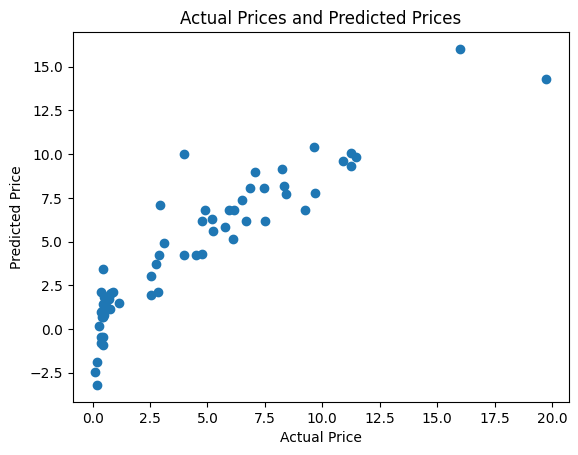

In [145]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices and Predicted Prices")
plt.show()